In [1]:
import torch, random
from statistics import mean
from cebmf_torch import cEBMF
import matplotlib.pyplot as plt
# ---- config
NUM_RUNS   = 2
N, P       = 50, 40
NOISE_STD  = 1.0
MAXIT      = 50
TOL        = 1e-9   # numerical tolerance for strictness

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.set_default_dtype(torch.float64)

def is_strictly_increasing(xs, tol=0.0001):
    # xs[t+1] > xs[t] + tol  for all t
    return all(xs[t+1] > xs[t] + tol for t in range(len(xs)-1))

def is_strictly_decreasing(xs, tol=0.0):
    # xs[t+1] < xs[t] - tol  for all t
    return all(xs[t+1] < xs[t] - tol for t in range(len(xs)-1))

def one_run(seed):
    # reproducibility
    random.seed(seed)
    torch.manual_seed(seed)

    # rank-1 signal + Gaussian noise
    u = torch.rand(N, device=device)
    v = torch.rand(P, device=device)
    Y = torch.outer(u, v) + NOISE_STD * torch.randn(N, P, device=device)

    model = cEBMF(data=Y, K=5, prior_F="point_laplace",allow_backfitting=True,
                 prior_L="point_laplace") 
    model.fit(maxit=MAXIT)

    loss_hist = model.obj                       # your stored objective = negative ELBO
    return(loss_hist)
 


results=[]

for i in range(NUM_RUNS):
    results.append( one_run(i))
 

5
5
5
3
3
3
2
2
2
5
5
5
4
4
4
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [2]:
def is_strictly_increasing(xs, tol=0.0001):
    # xs[t+1] > xs[t] + tol  for all t
    return all(xs[t+1] > xs[t] - tol for t in range(len(xs)-1))

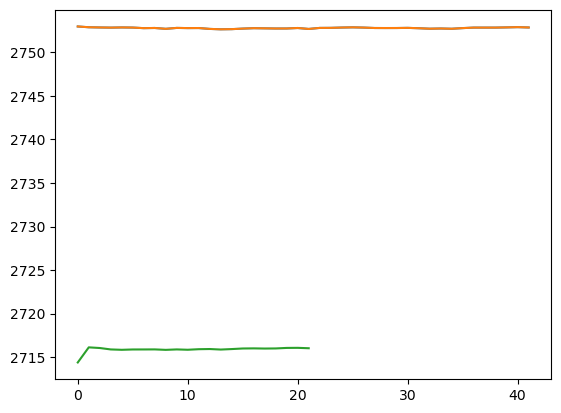

In [3]:
plt.plot(results[0])
for i in range(NUM_RUNS):
    plt.plot(results[i])

In [4]:
h=0

for i in range(NUM_RUNS):
    if (is_strictly_increasing(results[i], tol=.1))== False:
        h=h+1
print(h)

2


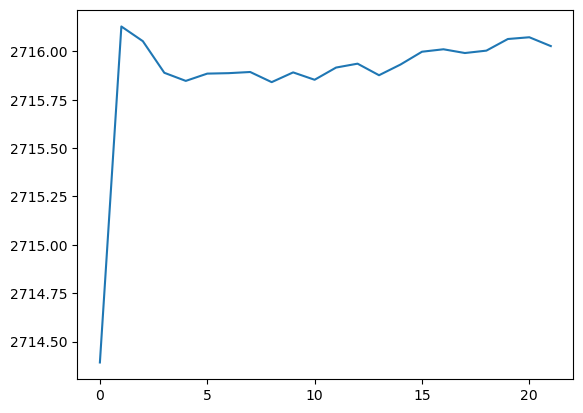

In [5]:
plt.plot(results[1])